In [1]:
import os
import pandas as pd
import numpy as np
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

Folders = os.listdir('./HandLabeledData')

SDContainer = {
    'DoubleRhythmic': [[], []],
    'RhythmicAndRandom': [],
    'SingleRhythmic': []
}

for Folder in Folders:
    FolderPath = os.path.join('./HandLabeledData', Folder)
    FilePaths = os.listdir(FolderPath)
    for File in FilePaths:
        FullFilePath = os.path.join(FolderPath,File)
        RunDF = pd.read_csv(FullFilePath)
        if Folder == 'DoubleRhythmic':
            RhythmOne = RunDF[RunDF['Rhythm'] == 'Rhythm 1']['Value']
            RhythmTwo = RunDF[RunDF['Rhythm'] == 'Rhythm 2']['Value']
            
            RhythmOne = np.diff(RhythmOne)
            RhythmTwo = np.diff(RhythmTwo)
            
            RhythmOneSD = np.std(RhythmOne)
            RhythmTwoSD = np.std(RhythmTwo)
            SDContainer[Folder][0].append(RhythmOneSD)
            SDContainer[Folder][1].append(RhythmTwoSD)
        else:
            RhythmOne = RunDF[RunDF['Rhythm'] == 'Rhythm 1']['Value'] 
            RhythmOneSD = np.std(RhythmOne)
            SDContainer[Folder].append(RhythmOneSD)

C:\Users\Andrew\AppData\Local\Temp\ipykernel_19912\3672926895.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_violin, x="Group", y="SD Value", inner="box", palette="muted")


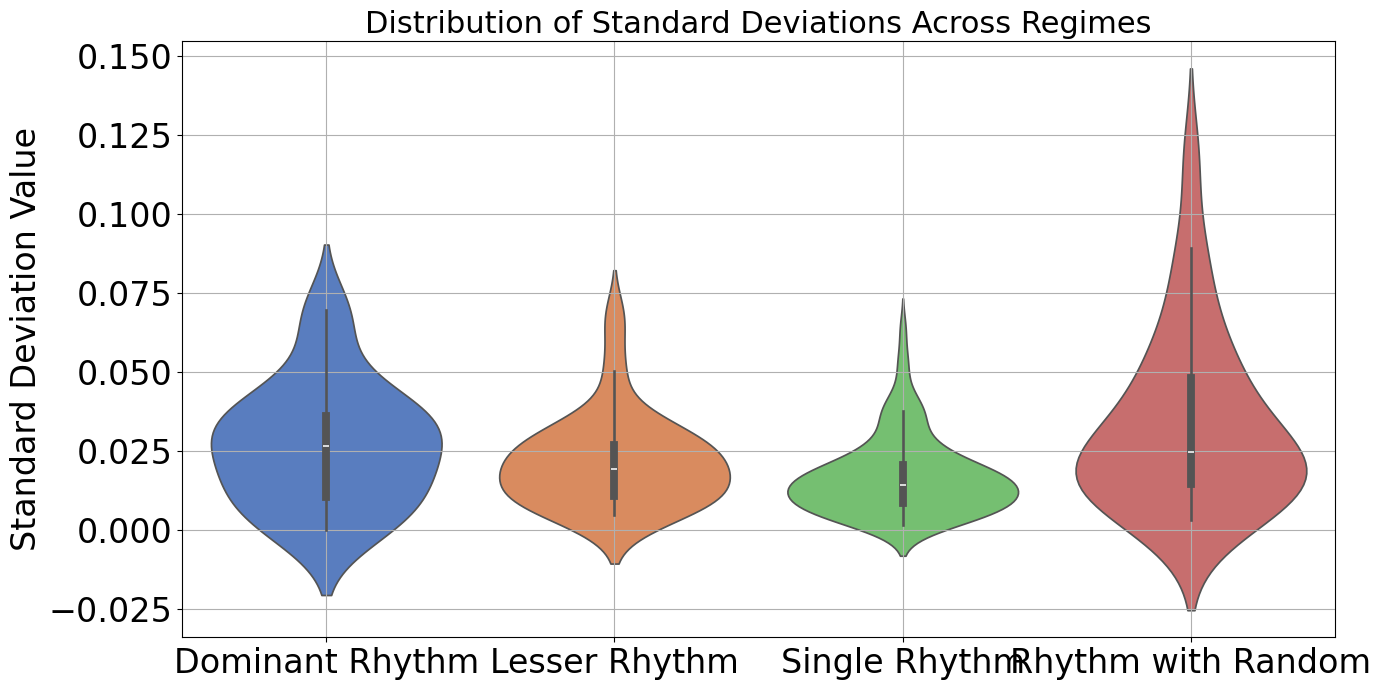

In [ ]:
DoubleR1SD = SDContainer['DoubleRhythmic'][0]
DoubleR2SD = SDContainer['DoubleRhythmic'][1]
SingleR1SD = SDContainer['SingleRhythmic']
RhythmicAndRandom = SDContainer['RhythmicAndRandom']

df_violin = pd.DataFrame({
    "SD Value": DoubleR1SD + list(DoubleR2SD) + list(SingleR1SD) + list(RhythmicAndRandom),
    "Group": (["DoubleR1SD"] * len(DoubleR1SD)) +
             (["DoubleR2SD"] * len(DoubleR2SD)) +
             (["SingleR1SD"] * len(SingleR1SD)) +
             (["RhythmicAndRandom"] * len(RhythmicAndRandom))
})

plt.figure(figsize=(14, 7))
sns.violinplot(data=df_violin, x="Group", y="SD Value", inner="box", palette="muted")

plt.title("Distribution of Standard Deviations Across Regimes", fontsize=22)
plt.xlabel("")  # Remove x-axis label
plt.ylabel("Standard Deviation Value", fontsize=24)

plt.xticks([0, 1, 2, 3], 
           ['Dominant Rhythm', 'Lesser Rhythm', 'Single Rhythm', 'Rhythm with Random'], 
           fontsize=22, rotation=0)

plt.tick_params(axis='both', labelsize=24)

plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
shapiro_results = {
    "DoubleR1SD": shapiro(DoubleR1SD),
    "DoubleR2SD": shapiro(DoubleR2SD),
    "SingleR1SD": shapiro(SingleR1SD),
    "RhythmicAndRandom": shapiro(RhythmicAndRandom)
}

levene_results = {
    "DoubleR1SD vs DoubleR2SD": levene(DoubleR1SD, DoubleR2SD),
    "DoubleR1SD vs SingleR1SD": levene(DoubleR1SD, SingleR1SD),
    "DoubleR1SD vs RhythmicAndRandom": levene(DoubleR1SD, RhythmicAndRandom)
}

ttest_results = {
    "DoubleR1SD vs DoubleR2SD": ttest_ind(DoubleR1SD, DoubleR2SD, equal_var=True),
    "DoubleR1SD vs SingleR1SD": ttest_ind(DoubleR1SD, SingleR1SD, equal_var=False)
}

mannwhitney_results = {
    "SingleR1SD vs DoubleR1SD": mannwhitneyu(SingleR1SD, DoubleR1SD, alternative='less'),
    "SingleR1SD vs RhythmicAndRandom": mannwhitneyu(SingleR1SD, RhythmicAndRandom, alternative='less'),
    "SingleR1SD vs DoubleR2SD": mannwhitneyu(SingleR1SD, DoubleR2SD, alternative='less'),
    "DoubleR2SD vs DoubleR1SD": mannwhitneyu(DoubleR2SD, DoubleR1SD, alternative='less'),
    "DoubleR2SD vs RhythmicAndRandom": mannwhitneyu(DoubleR2SD, RhythmicAndRandom, alternative='less')
}

shapiro_results, levene_results, ttest_results, mannwhitney_results

({'DoubleR1SD': ShapiroResult(statistic=np.float64(0.9453987675495248), pvalue=np.float64(0.2149251635218758)),
  'DoubleR2SD': ShapiroResult(statistic=np.float64(0.8706924673287741), pvalue=np.float64(0.005427730467078014)),
  'SingleR1SD': ShapiroResult(statistic=np.float64(0.88706642392816), pvalue=np.float64(4.08081088615157e-07)),
  'RhythmicAndRandom': ShapiroResult(statistic=np.float64(0.8511578847194877), pvalue=np.float64(0.0009865741860003007))},
 {'DoubleR1SD vs DoubleR2SD': LeveneResult(statistic=np.float64(2.485273475935225), pvalue=np.float64(0.12176957393551464)),
  'DoubleR1SD vs SingleR1SD': LeveneResult(statistic=np.float64(9.844822215236219), pvalue=np.float64(0.0021392710930636513)),
  'DoubleR1SD vs RhythmicAndRandom': LeveneResult(statistic=np.float64(0.8661027049295205), pvalue=np.float64(0.3565083067440412))},
 {'DoubleR1SD vs DoubleR2SD': TtestResult(statistic=np.float64(1.0491455368224685), pvalue=np.float64(0.29959217809792993), df=np.float64(46.0)),
  'Doubl

C:\Users\Andrew\AppData\Local\Temp\ipykernel_19912\2628231186.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_violin, x="Group", y="SD Value", inner="box", palette="muted")
C:\Users\Andrew\AppData\Local\Temp\ipykernel_19912\2628231186.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=24, loc='upper right')


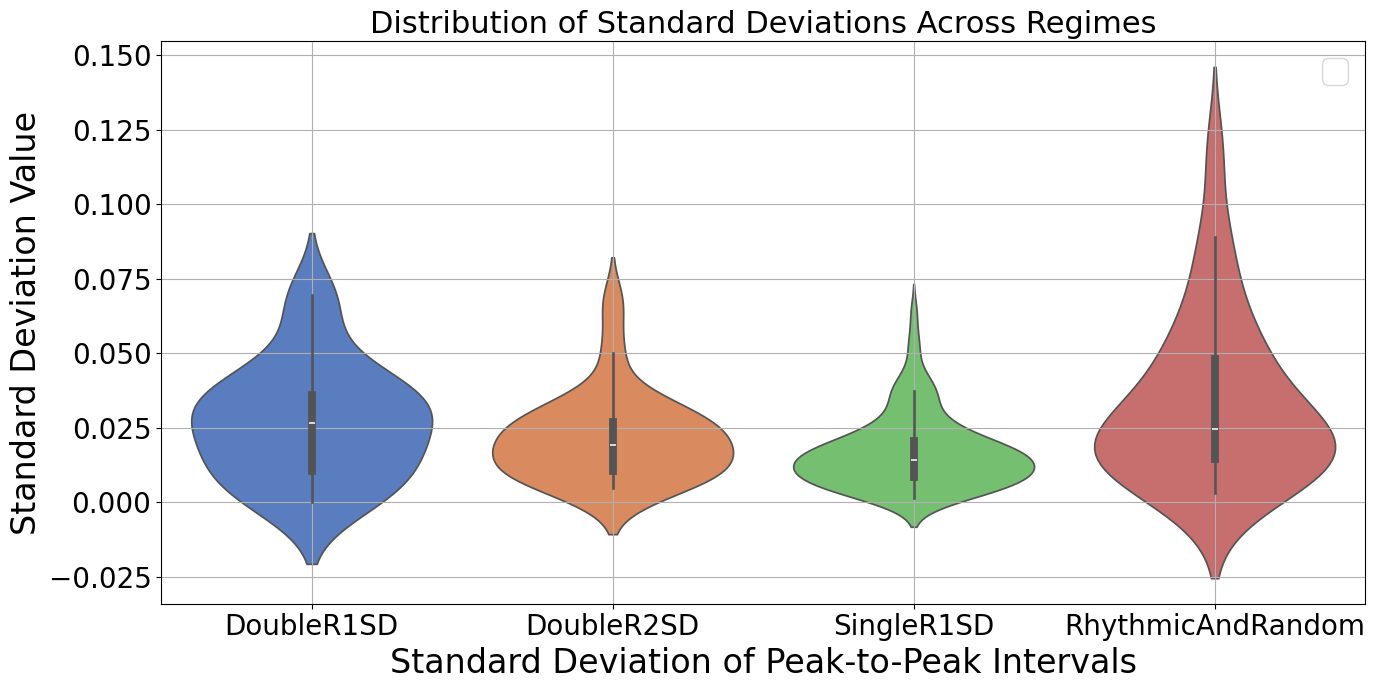

In [ ]:
DoubleR1SD = SDContainer['DoubleRhythmic'][0]
DoubleR2SD = SDContainer['DoubleRhythmic'][1]
SingleR1SD = SDContainer['SingleRhythmic']
RhythmicAndRandom = SDContainer['RhythmicAndRandom']

df_violin = pd.DataFrame({
    "SD Value": DoubleR1SD + list(DoubleR2SD) + list(SingleR1SD) + list(RhythmicAndRandom),
    "Group": (["DoubleR1SD"] * len(DoubleR1SD)) +
             (["DoubleR2SD"] * len(DoubleR2SD)) +
             (["SingleR1SD"] * len(SingleR1SD)) +
             (["RhythmicAndRandom"] * len(RhythmicAndRandom))
})

plt.figure(figsize=(14, 7))
sns.violinplot(data=df_violin, x="Group", y="SD Value", inner="box", palette="muted")

plt.title("Distribution of Standard Deviations Across Regimes", fontsize=22)
plt.xlabel("Standard Deviation of Peak-to-Peak Intervals", fontsize=24)
plt.ylabel("Standard Deviation Value", fontsize=24)
plt.legend(fontsize=24, loc='upper right')

plt.tick_params(axis='both', labelsize=20)

plt.grid(True)
plt.tight_layout()
plt.show()